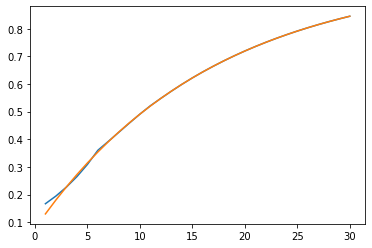

(0.16666666666666752,
 0.16666666666666666,
 -0.9236940367882949,
 -0.923694036788295)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)


z = 1

# n = 36
# f = np.zeros(n)
# f[1], f[2], f[5], f[8], f[11], f[17], f[35] = 6, 9, 22, 24, 26, 60, 37

n = 6
f = np.zeros(n)
f[1], f[2], f[5] = 0, 0, 1

f /= np.sum(f)

p = lambda d: n / (n + z) / (d + 1)
p_g = 1 - f @ p(np.arange(n))

c = np.vectorize(lambda l: f[l:] @ p(np.arange(l, n)))
Q = np.append(c(np.arange(1, n)), -p_g)
x = np.roots(Q)
r = 1 / x

V = np.vander(x)
mu = -np.ones(n - 1) @ np.linalg.inv(V)
mu_real = -np.real(np.exp(np.sum(np.log((1 - x[:-1]) / (x[-1] - x[:-1])))))  # Quick leading term

q = np.vectorize(lambda k: 1 + np.real(mu @ r ** k))

k = np.arange(1, 5 * n + 1)
q_k = q(k)

plt.plot(k, q_k)
plt.plot(k, 1 + mu_real * np.real(r[-1]) ** k)
plt.show()

float(q(1)), z / (n + z) / p_g, np.real(mu[-1]), mu_real

In [2]:
r

array([-0.52157021-0.34749943j, -0.52157021+0.34749943j,
        0.13382868-0.65761482j,  0.13382868+0.65761482j,
        0.94214973+0.j        ])

In [3]:
k_half = 1 + int(np.log(-1 / 2 / mu_real) / np.log(np.real(r[-1])))
k_half, q(k_half)

(11, array(0.52129521))

In [4]:
def show_phi(u0):
    M = 2000  # Nombre de trajectoires
    N = 2500 # Nombre de tours de roulette
    du = np.random.choice(-np.arange(-1, n), size=(M, N), replace=True, p=np.append(p_g, f * p(np.arange(n))))
    u = u0 + np.hstack((np.zeros((M, 1)), np.cumsum(du, axis=1)))
    u_alive = ~np.cumsum(u<=0, axis=1).astype(bool)
    u_cutted = u*(u_alive)
    phi = np.mean(u_alive, axis=0)
    plt.title("Évolution des réserves monétaires avec accidents à couvrir")
    plt.xlabel("nombre de tours de roulette")
    plt.ylabel("fortune (en jetons)")
    plt.plot(u.T, c='gray')
    plt.plot(u_cutted.T)
    plt.show()
    plt.title("Probabilité de non-ruine")
    plt.xlabel("nombre de tours de roulette")
    plt.ylabel("probabilité")
    plt.plot(phi)
    plt.show()

In [5]:
def phi_inf(u0):
    M = 2000  # Nombre de trajectoires
    N = 2500 # Nombre de tours de roulette
    du = np.random.choice(-np.arange(-1, n), size=(M, N), replace=True, p=np.append(p_g, f * p(np.arange(n))))
    u = u0 + np.hstack((np.zeros((M, 1)), np.cumsum(du, axis=1)))
    u_alive = ~np.cumsum(u<=0, axis=1).astype(bool)
    u_cutted = u*(u_alive)
    phi = np.mean(u_alive, axis=0)
    return phi[-1]

v_phi_inf = np.vectorize(phi_inf)

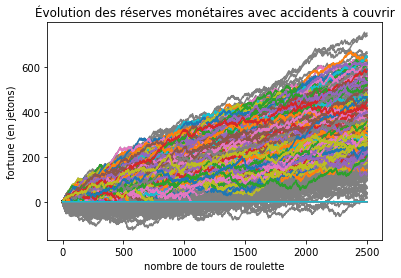

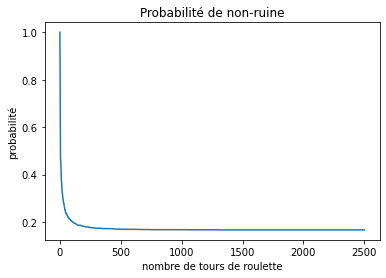

In [6]:
show_phi(1)

In [7]:
phi_k = v_phi_inf(k)

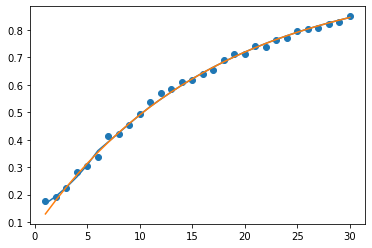

In [8]:
plt.plot(k, q_k)
plt.plot(k, 1 + mu_real * np.real(r[-1]) ** k)
plt.scatter(k, phi_k)
plt.show()